<a href="https://colab.research.google.com/github/amaljoseph/TensorflowLearnings/blob/master/LinearRegressionNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf

In [0]:
import matplotlib.pyplot as plt

In [0]:
n_features = 10
n_dense_neurons = 3

In [0]:
x = tf.placeholder(tf.float32, shape=(None, n_features))

In [0]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))
b= tf.Variable(tf.ones([n_dense_neurons]))

In [0]:
xW = tf.matmul(x, W)
z = tf.add(xW, b)

In [0]:
a = tf.sigmoid(z)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  sess.run(init)
  layer_out = sess.run(a, feed_dict={x:np.random.random([1, n_features])})

In [14]:
print(layer_out)

[[0.38636908 0.9877171  0.80327886]]


In [0]:
##Simple Regression NNExample

In [18]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
x_data

array([-1.31532774, -0.0332734 ,  1.6164207 ,  3.99219263,  3.72380382,
        4.25758001,  6.8949252 ,  7.67194141,  9.58967823, 10.30113708])

In [20]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
y_label

array([1.19126135, 0.57224537, 1.69011046, 3.74200674, 4.74308027,
       5.94813692, 6.20983378, 7.98263291, 7.84860889, 9.84867375])

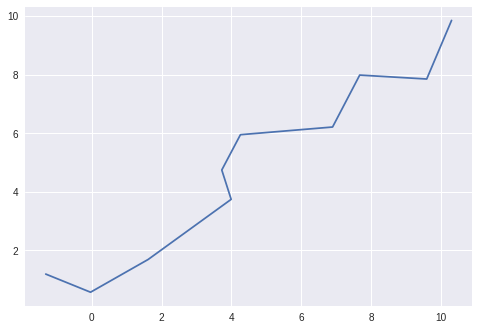

In [23]:
plt.plot(x_data, y_label)

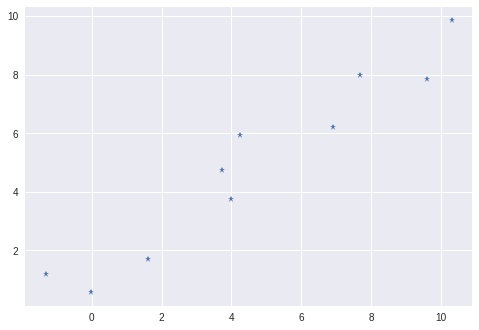

In [24]:
plt.plot(x_data, y_label, '*')

In [0]:
#y = mx + b

In [0]:
#two random numbers
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [0]:
#cose function
error = 0
for x, y in zip(x_data, y_label):
  y_hat = m*x + b
  
  error += (y-y_hat)**2

In [0]:
#optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  sess.run(init)
  
  training_steps = 100
  
  for i in range(training_steps):
    sess.run(train)
    
  final_slope, final_intercept = sess.run([m,b])

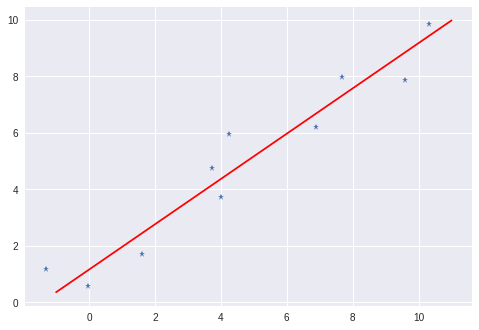

In [33]:
x_test = np.linspace(-1, 11, 10)
#y=mx+b
y_pred_plot = final_slope*x_test + final_intercept
plt.plot(x_data, y_label, '*')
plt.plot(x_test, y_pred_plot, 'r')